In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from altair import Chart, X,Y, Axis, Scale, Color, Legend, Shape

In [2]:
df = pd.read_csv("../data/double_hybrid_bucket_basic_circuits.csv")

In [ ]:
df.columns

In [ ]:
np.unique(df['name'])

In [ ]:
df[df['n'] == 36][['n', 'q','name','total_time','total_phys_q']]

In [ ]:
df[df['n'] == 15][['n', 'q','name','total_time','total_phys_q']]

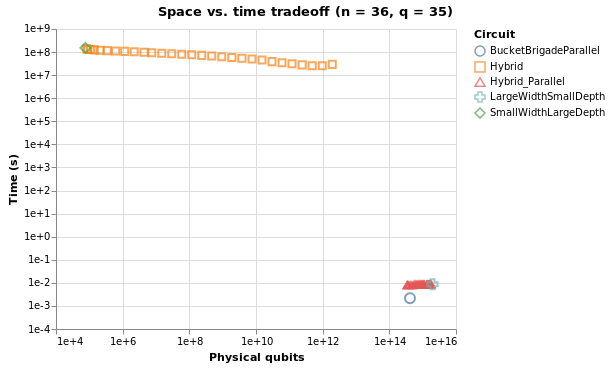

In [3]:
# Space vs. time tradeoff
hybrids = df[np.logical_and([(df['name'][i] == "Hybrid" or df['name'][i] == "Hybrid_Parallel") for i in range(df.shape[0])], np.logical_and(df['n'] == 36, df['q'] == 35))]

nonhybrids = df[np.logical_and([df['name'][i][0:6] != "Hybrid" and df['name'][i][0:6] != "Double" for i in range(df.shape[0])], np.logical_and(df['n'] == 36, np.logical_or(df['q'] == 35, df['q'] == 0)))]
nonhybrids = nonhybrids[nonhybrids['name'] != "BucketBrigade"]

lines = Chart(hybrids, name="space_v_time_basic_bucket", title="Space vs. time tradeoff (n = 36, q = 35)").mark_point(size=50).encode(x=X('total_phys_q',
                                  scale=Scale(type='log',
                                              domain=[1e4,1e16]),
                                  axis=Axis(title="Physical qubits",
                                            format="e", tickCount=6)),
                              y=Y('total_time',
                                  scale=Scale(type='log',domain=[1e-4,1e9]),
                                  axis=Axis(title="Time (s)",
                                            format="e")),
                               shape='name',                                                                                     
                              color=Color('name', legend=Legend(title="Circuit"))
                              )

points = Chart(nonhybrids).mark_point(size=100).encode(x=X('total_phys_q'), y=('total_time'), shape='name', color='name')

lines + points


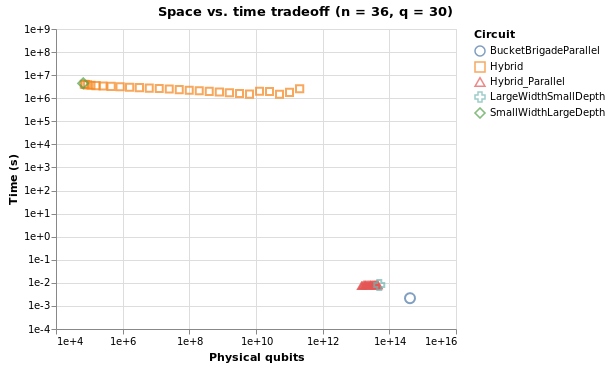

In [4]:
# Space vs. time tradeoff
hybrids = df[np.logical_and([(df['name'][i] == "Hybrid" or df['name'][i] == "Hybrid_Parallel") for i in range(df.shape[0])], np.logical_and(df['n'] == 36, df['q'] == 30))]

nonhybrids = df[np.logical_and([df['name'][i][0:6] != "Hybrid" and df['name'][i][0:6] != "Double" for i in range(df.shape[0])], np.logical_and(df['n'] == 36, np.logical_or(df['q'] == 30, df['q'] == 0)))]
nonhybrids = nonhybrids[nonhybrids['name'] != "BucketBrigade"]


lines = Chart(hybrids, name="space_v_time_basic_bucket", title="Space vs. time tradeoff (n = 36, q = 30)").mark_point(size=50).encode(x=X('total_phys_q',
                                  scale=Scale(type='log',
                                              domain=[1e4,1e16]),
                                  axis=Axis(title="Physical qubits",
                                            format="e", tickCount=6)),
                              y=Y('total_time',
                                  scale=Scale(type='log',domain=[1e-4,1e9]),
                                  axis=Axis(title="Time (s)",
                                            format="e")),
                               shape='name',                                                                                     
                              color=Color('name', legend=Legend(title="Circuit"))
                              )

points = Chart(nonhybrids).mark_point(size=100).encode(x=X('total_phys_q'), y=('total_time'), shape='name', color='name')

lines + points


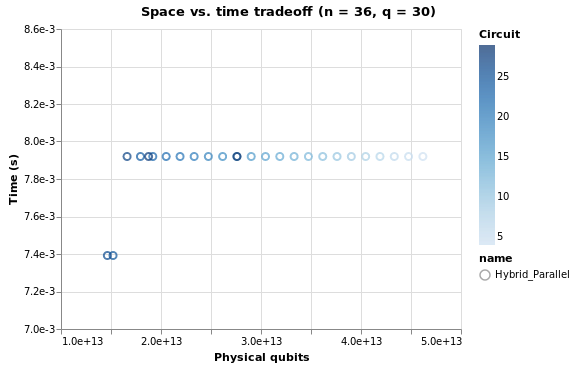

In [5]:
# Look only at the parallel hybrid and see how it varies with k
hybrids = df[np.logical_and([df['name'][i] == "Hybrid_Parallel" for i in range(df.shape[0])], np.logical_and(df['n'] == 36, df['q'] == 30))]

Chart(hybrids, name="space_v_time_basic_bucket", title="Space vs. time tradeoff (n = 36, q = 30)").mark_point(size=50).encode(x=X('total_phys_q',
                                  scale=Scale(
                                              domain=[1e13,5e13]),
                                  axis=Axis(title="Physical qubits",
                                            format="e", tickCount=6)),
                              y=Y('total_time',
                                  scale=Scale(domain=[7e-3,8.5e-3]),
                                  axis=Axis(title="Time (s)",
                                            format="e")),
                               shape='name',                                                                                     
                              color=Color('k', legend=Legend(title="Circuit"))
                              )

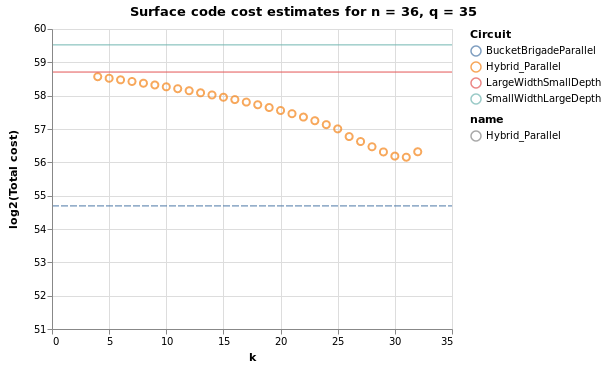

In [7]:
# Space vs. time tradeoff

ldw = df[np.logical_or(df['name'] == 'LargeWidthSmallDepth', df['name'] == 'SmallWidthLargeDepth')]
ldw = ldw[np.logical_and(ldw['n'] == 36, ldw['q'] == 35)]

bb = df[df['name'] == 'BucketBrigadeParallel']
bb = bb[bb['n'] == 36]

hybrid = df[[df['name'][i] == "Hybrid_Parallel" for i in range(df.shape[0])]]
hybrid = hybrid[np.logical_and(hybrid['n'] == 36, hybrid['q'] == 35)]

title = "Surface code cost estimates for n = 36, q = 35"

points = Chart(hybrid, title=title).mark_point(size=50).encode(
                              x=X('k',
                                  scale=Scale(domain=[2,34]),
                                  axis=Axis(title="k")),
                              y=Y('total_cost',
                                  scale=Scale(domain=[51,60]),
                                  axis=Axis(title="log2(Total cost)")), shape='name',
                              color=Color('name', legend=Legend(title="Circuit")))

rules_ldw = Chart(ldw).mark_rule().encode(y='total_cost', color=Color('name', legend=Legend(title="Circuit")))
rules_bb = Chart(bb).mark_rule(strokeDash=[7, 2]).encode(y='total_cost', color=Color('name', legend=Legend(title="Circuit")))

points + rules_ldw + rules_bb

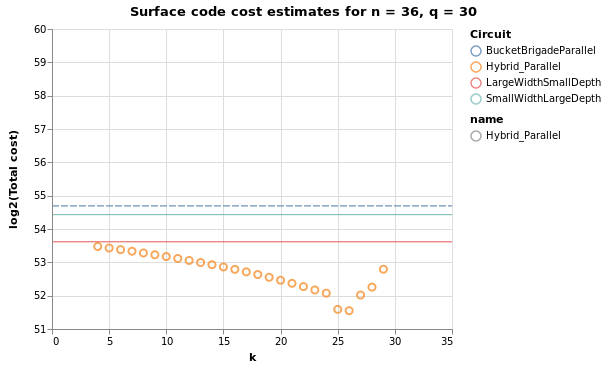

In [8]:
# Space vs. time tradeoff
ldw = df[np.logical_or(df['name'] == 'LargeWidthSmallDepth', df['name'] == 'SmallWidthLargeDepth')]
ldw = ldw[np.logical_and(ldw['n'] == 36, ldw['q'] == 30)]

bb = df[df['name'] == 'BucketBrigadeParallel']
bb = bb[bb['n'] == 36]

hybrid = df[[df['name'][i] == "Hybrid_Parallel" for i in range(df.shape[0])]]
hybrid = hybrid[np.logical_and(hybrid['n'] == 36, hybrid['q'] == 30)]

title = "Surface code cost estimates for n = 36, q = 30"

points = Chart(hybrid, title=title).mark_point(size=50).encode(
                              x=X('k',
                                  scale=Scale(domain=[2,34]),
                                  axis=Axis(title="k")),
                              y=Y('total_cost',
                                  scale=Scale(domain=[51,60]),
                                  axis=Axis(title="log2(Total cost)")),
                              shape='name',
                              color=Color('name', legend=Legend(title="Circuit")))

rules_ldw = Chart(ldw).mark_rule().encode(y='total_cost', 
                              shape='name', color=Color('name', legend=Legend(title="Circuit")))
rules_bb = Chart(bb).mark_rule(strokeDash=[7, 2]).encode(y='total_cost', 
                              shape='name', color=Color('name', legend=Legend(title="Circuit")))

points + rules_ldw + rules_bb